In [1]:
# NO CODE

from datascience import *
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import numpy as np
from scipy import stats

In [2]:
# NO CODE

def plot_t_normal(df):
    x = np.arange(-6, 6.01, 0.01)
    t_density = stats.t.pdf(x, df)
    normal = stats.norm.pdf(x)
    plt.figure(figsize=(8, 4))
    plt.plot(x, t_density, lw=2, label='$t$ ('+str(df)+' degrees of freedom)')
    plt.plot(x, normal, lw = 2, label = 'standard normal')
    plt.legend(bbox_to_anchor=(0.5, 1));

## The Distribution of the Estimated Slope ##

Our estimate of the signal $Y = \beta_0 + \beta_1x$ is the corresponding point on the regression line:

$$
\hat{Y} ~ = ~ \hat{\beta}_0 + \hat{\beta}_1x
$$

Here $\hat{\beta}_1$ is the slope of the regression line (we called it $\hat{a}$ in our earlier calculations) and $\hat{\beta_0}$ is the intercept (we called it $\hat{b}$) of the regression line.

Recall that when we derived the formula for the best slope $\hat{a}$, we first obtained

$$
\hat{a} ~ = ~ \frac{E(D_XD_Y)}{\sigma_X^2}
$$

where $D_X$ and $D_Y$ were the deviations of $X$ and $Y$. In our current context, we must apply this formula to the empirical distribution of the data. That's easier than it sounds. For example, the variance $\sigma_X^2$ is by definition the mean squared deviation, which becomes $\frac{1}{n}\sum_{i=1}^n (x_i - \bar{x})^2$. The mean product of deviations $E(D_XD_Y)$ becomes $\frac{1}{n}\sum_{i=1}^n (x_i - \bar{x})(Y_i - \bar{Y})$.

### Estimated Slope ###

The least-squares estimate of the true slope $\beta_1$ is the slope of the regression line, given by

$$
\hat{\beta}_1 ~ = ~ \frac{\frac{1}{n}\sum_{i=1}^n (x_i - \bar{x})(Y_i - \bar{Y})}{\frac{1}{n}\sum_{i=1}^n (x_i - \bar{x})^2}
$$

The average response $\bar{Y}$ is a linear combination of the independent normal random variables $Y_1, Y_2, \ldots, Y_n$. Therefore so is the $i$th deviation $\bar{Y_i} - \bar{Y}$ for each $i$. 

Thus $\hat{\beta}_1$ is a linear combination of the independent normal random variables $Y_1, Y_2, \ldots, Y_n$. Therefore the distribution of $\hat{\beta}_1$ is normal.

### Expectation of the Estimated Slope ###

To identify the mean of the distribution of $\hat{\beta}_1$, recall that $E(Y_i) = \beta_0 + \beta_1x_i$ and $E(\bar{Y}) = \beta_0 + \beta_1\bar{x}$. So

$$
E(Y_i - \bar{Y}) ~ = ~ \beta_1(x_i - \bar{x})
$$

Now

$$
\begin{align*}
E(\hat{\beta_1}) ~ &= ~ \frac{\frac{1}{n}\sum_{i=1}^n (x_i - \bar{x})E(Y_i - \bar{Y})}{\frac{1}{n}\sum_{i=1}^n (x_i - \bar{x})^2} \\ \\
&= ~ \frac{\frac{1}{n}\sum_{i=1}^n (x_i - \bar{x})\beta_1(x_i - \bar{x})}{\frac{1}{n}\sum_{i=1}^n (x_i - \bar{x})^2} \\ \\
&= ~ \frac{\beta_1\frac{1}{n}\sum_{i=1}^n (x_i - \bar{x})^2}{\frac{1}{n}\sum_{i=1}^n (x_i - \bar{x})^2} \\ \\
&= ~ \beta_1
\end{align*}
$$

We have shown that $\hat{\beta_1}$ is an unbiased estimator of $\beta_1$.

The distribution of the estimated slope $\hat{\beta}_1$ is normal, centered at the true slope $\beta_1$.

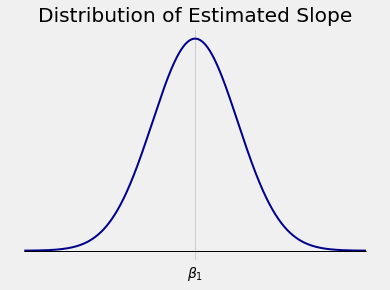

In [3]:
# NO CODE

x = np.arange(-4, 4.01, 0.01)
y = stats.norm.pdf(x)
plt.plot(x, y, lw=2, color='darkblue')
plt.plot([-4, 4], [0, 0], lw=1, color='k')
plt.xticks([0], [r'$\beta_1$'])
plt.yticks([])
plt.xlabel('')
plt.title('Distribution of Estimated Slope');

If we can find $Var(\hat{\beta}_1)$ then we can use this normal curve for inference. For example, 

$$
\hat{\beta}_1 ~ \pm ~ 2SD(\hat{\beta}_1)
$$

is a 95% confidence interval for $\beta_1$.

### Variance of the Estimated Slope ###

To find $Var(\hat{\beta}_1)$ is helps to know how to find variances of sums of dependent random variables, which is outside the scope of this class. So we will simply state that

$$
Var(\hat{\beta}_1) ~ = ~ \frac{\sigma^2}{\sum_{i=1}^n (x_i - \bar{x})^2}
$$

In fact we will not use the exact formula for the variance. It is enough to notice that:

- The numerator is the constant error variance. The denominator gets larger (there are more terms) when $n$ increases. So the more data we have, the closer the estimated slope $\hat{\beta}_1$ will be to the true slope $\beta_1$, most likely.
- The expression for $Var(\hat{\beta}_1)$ involves the unknown error variance $\sigma^2$, but no other unknown parameter is involved.

### Standard Error of the Estimated Slope ###
We know that

$$
SD(\hat{\beta}_1) ~ = ~ \frac{\sigma}{\sqrt{\sum_{i=1}^n (x_i - \bar{x})^2}}
$$

but we can't get a numerical value for this SD since $\sigma$ is unknown.

So we estimate $\sigma$ based on the data, by using the SD of the residuals instead. When the standard deviation of an estimator is estimated from the data, it is sometimes called the *standard error* of the estimator. We will denote the standard error of $\hat{\beta}_1$ by $SE(\hat{\beta}_1)$.

The larger $n$ is, the better the estimate of $\sigma$. So for large $n$, the distribution of the standardized slope

$$
T ~ = ~ \frac{\hat{\beta}_1 - \beta_1}{SE(\hat{\beta}_1)}
$$

is approximately standard normal.

Almost all programming languages and statistical systems come with modules or routines that carry out regression calculations. They will provide you with numerical values of $\hat{\beta}_1$ and $SE(\hat{\beta}_1)$. Here is an example.

### Pulse Rates ###

The table `pulse` from the [R project](https://vincentarelbundock.github.io/Rdatasets/doc/Stat2Data/Pulse.html) contains data on the pulse rates of $232$ students before and after exercise. The first two columns are the active and resting pulse rates. 

In [4]:
# NO CODE 

pulse = Table.read_table('../../../data/Pulse.csv').drop(0)

In [5]:
pulse

Active,Rest,Smoke,Sex,Exercise,Hgt,Wgt
97,78,0,1,1,63,119
82,68,1,0,3,70,225
88,62,0,0,3,72,175
106,74,0,0,3,72,170
78,63,0,1,3,67,125
109,65,0,0,3,74,188
66,43,0,1,3,67,140
68,65,0,0,3,70,200
100,63,0,0,1,70,165
70,59,0,1,2,65,115


Our goal is to predict the active pulse rate based on the resting pulse rate.

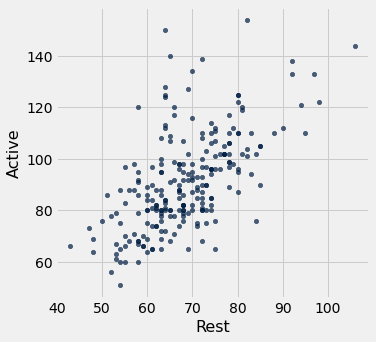

In [6]:
pulse.scatter('Rest', 'Active')

The scatter plot of the active rate versus the resting rate shows a linear relation. The plot is a bit wider in the middle than it is elsewhere, which indicates that the regression model's assumption of equal error variances for all individuals might not be satisfied. However, we can use the model as a rough approximation of reality.

To use Python to perform the regression, we must first get the data in an appropriate form. One way is to extract the values of the response and predictor variables as arrays.

In [7]:
active = pulse.column(0)
resting = pulse.column(1)

The call `stats.linregress(x, y)` performs the simple linear regression of the array `y` on the array `x`. That means $y$ is the response and $x$ the predictor variable.

In [8]:
stats.linregress(x=resting, y=active)

LinregressResult(slope=1.1428796819048308, intercept=13.182572776013359, rvalue=0.60418708810600918, pvalue=1.7861044071652305e-24, stderr=0.099388844363891435, intercept_stderr=6.8644300361667909)

That's a bit of a mess. Let's assign each element of the output to a name. Note that `stderr` is the SE of the slope.

In [9]:
slope, intercept, r, p, se_slope = stats.linregress(x=resting, y=active)
slope, intercept, r, p, se_slope

(1.1428796819048308,
 13.182572776013359,
 0.60418708810600918,
 1.7861044071652305e-24,
 0.099388844363891435)

The numbers in the output are the observed values of:

- the estimated slope $\hat{\beta}_1$
- the estimated intercept $\hat{\beta_0}$
- the correlation $r$
- the $p$-value of a test that we will describe below
- the standard error of the estimated slope, $SE(\hat{\beta}_1)$.

The sample size is large ($232$), so the distribution of $\hat{\beta}_1$ is approximately normal with mean $\beta_1$ and SD approximately equal to $SE(\hat{\beta}_1)$. Therefore the calculation below results in an approximate 95% confidence interval for the true slope $\beta_1$.

In [10]:
# Approximate 95% confidence interval for the true slope

slope - 2*se_slope, slope + 2*se_slope

(0.9441019931770479, 1.3416573706326136)

A fundamentally important question is whether the true slope $\beta_1$ is $0$. If it is $0$ then the resting pulse rate isn't involved in the prediction of the active pulse rate, according to the regression model.

The 95% confidence interval for the slope doesn't contain 0, so we can conclude (at the 5% level) that the true slope isn't 0. We can also carry out a formal test of hypotheses as follows.

- $H_0$: $\beta_1 = 0$
- $H_A$: $\beta_1 \ne 0$

Under the null hypothesis, the distribution of the standardized slope

$$
T ~ = ~ \frac{\hat{\beta}_1 - 0}{SE(\hat{\beta}_1)}
$$

is approximately standard normal. The observed value of the test statistic is $11.5$.

In [11]:
# observed statistic under H_0:

(slope - 0) / se_slope

11.499074058255635

The observed slope is $11.5$ standard errors above the expected slope of $0$ under the null hypothesis. That's a whole lot of standard errors away from expectation. The data are not consistent with $H_0$; they favor the alternative hypothesis that the true slope is not $0$.

The output of `stats.linregress` provides the $p$-value of this test. Not surprisingly, it is microscopically small.

In [12]:
# p-value

p

1.7861044071652305e-24

### $t$ Statistic ###

The calculation above relies on the sample size being large enough so that $SE(\hat{\beta}_1)$ is almost certain to be essentially equal to $SD(\hat{\beta}_1)$. When the sample size is small or moderate, this might not be a good assumption.  

Fortunately, it turns out that it is possible to identify the exact distribution of $T$ for any sample size $n$. It is one of a family of bell-shaped distributions called the *$t$ distributions*. 

All $t$ distributions are symmetric around 0, just as the standard normal distribution is. 

The family of $t$ distributions is indexed by the positive integers: there's the $t$-distribution Number 1, the $t$-distribution Number 2, and so on. For reasons we won't go into, statisticians refer to the index as the *degrees of freedom* of the distribution.

The $t$ density looks like the standard normal curve, except that it has fatter tails. In the figure below, the red curve is the standard normal density and the blue curve is the $t$ density with $3$ degrees of freedom.

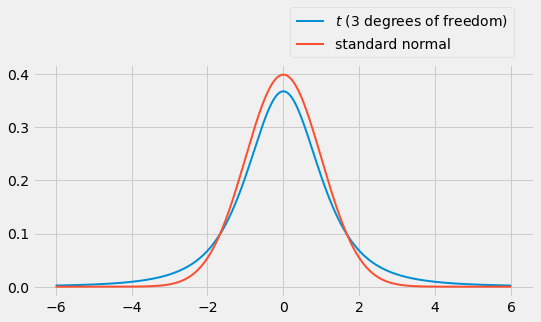

In [13]:
# NO CODE 

plot_t_normal(3)

You can see that the $t$ distribution has a bit more weight in the tails than the standard normal does. It gives us just the right additional amount of wiggle room to account for the fact that we are estimating the unknown error variance $\sigma^2$ based on the data.

When the degrees of freedom are larger then the $t$ distributions are almost indistinguishable from the standard normal as you can see below. So it's fine to use normal approximations the estimated slope when the sample size is large. 

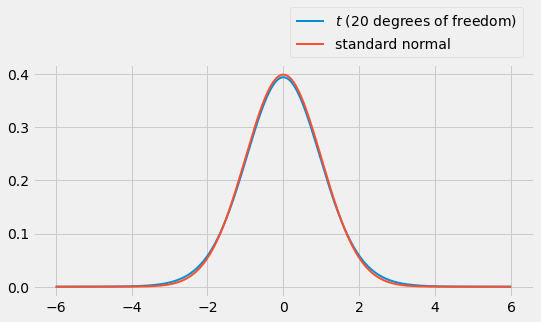

In [14]:
# NO CODE 

plot_t_normal(20)

For reasons we won't go into, under the regression model the exact distribution of the standardized slope $T$ is $t$ Number $n-2$ when the sample size is $n$. That is, for any sample size $n$, the standardized slope

$$
T ~ = ~ \frac{\hat{\beta}_1 - \beta_1}{SE(\hat{\beta}_1)}
$$

has the $t$ distribution with $n-2$ degrees of freedom. 

When the sample size $n$ is large, so is $n-2$, so we might as well use the normal curve. When the sample is size is small, using the appropriate $t$ curve gives more accurate answers.

To remember the number of degrees of freedom, keep in mind that we are basing our estimate of the response $Y$ on the two estimated parameters $\hat{\beta}_0$ and $\hat{\beta}_1$. Start with degrees of freedom equal to the sample size, and then lose one degree of freedom each for the intercept and slope. This rule can be extended to the case of multiple regression, as we will see in the next section.